In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import bokeh as bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from prophet import Prophet
from sklearn.linear_model import LinearRegression

In [2]:
file_path_store5 = Path('../data/store5_data.csv')

df_store5_data = pd.read_csv(file_path_store5)

df_store5_data = df_store5_data.dropna()

In [3]:

df_store5_data['date'] = pd.to_datetime(df_store5_data['date'])

df_store5_data['date_numeric'] = df_store5_data['date'].astype('int64')


In [4]:
df_store5_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606 entries, 378 to 991
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          606 non-null    datetime64[ns]
 1   Sales         606 non-null    float64       
 2   Gallons       606 non-null    float64       
 3   date_numeric  606 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 23.7 KB


<Axes: title={'center': 'Expected Sales based on date'}, xlabel='date', ylabel='Sales'>

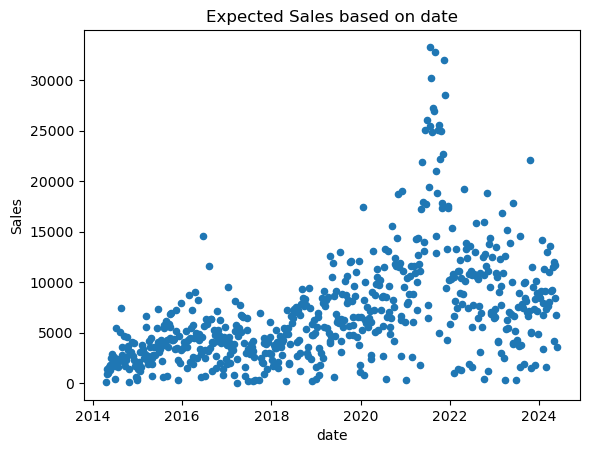

In [5]:
df_store5_data.plot.scatter(
    x = 'date'   ,
    y = 'Sales'     ,
    title = 'Expected Sales based on date'
)

<Axes: title={'center': 'Expected Sales in Gallons based on date'}, xlabel='date', ylabel='Gallons'>

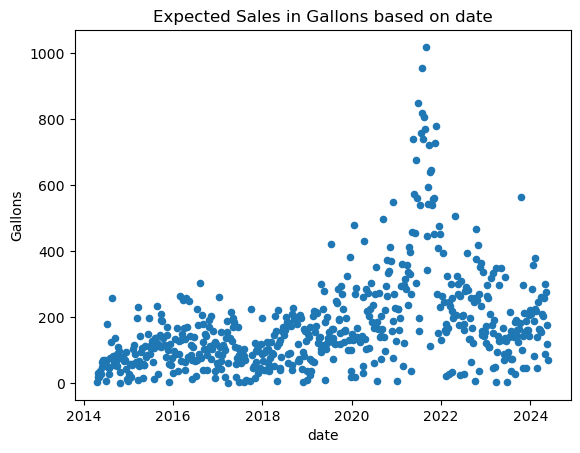

In [6]:
df_store5_data.plot.scatter(
    x = 'date'   ,
    y = 'Gallons'     ,
    title = 'Expected Sales in Gallons based on date'
)

In [7]:
X = df_store5_data[['date_numeric']].values.reshape(-1,1)

X[:5]

array([[1398038400000000000],
       [1398643200000000000],
       [1398643200000000000],
       [1399248000000000000],
       [1399852800000000000]], dtype=int64)

In [8]:
y = df_store5_data['Sales']

In [9]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
print(f"Model's slope: {model.coef_}")

print(f"Model's y-intercept: {model.intercept_}")

print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's slope: [2.89541067e-14]
Model's y-intercept: -38189.40859451305
Model's formula: y = -38189.40859451305 + 2.8954106698355195e-14X


In [11]:
predicted_y_values = model.predict(X)

In [12]:

df_store5_predicted = df_store5_data.copy()

df_store5_predicted["sales_predicted"] = predicted_y_values

df_store5_predicted.head()

,date,Sales,Gallons,date_numeric,sales_predicted
378,2014-04-21,135.84,3.0,1398038400000000000,2289.544407
379,2014-04-28,1380.55,20.0,1398643200000000000,2307.055851
380,2014-04-28,915.68,32.0,1398643200000000000,2307.055851
381,2014-05-05,1031.08,19.0,1399248000000000000,2324.567295
382,2014-05-12,1589.99,38.0,1399852800000000000,2342.078739


<Axes: xlabel='date'>

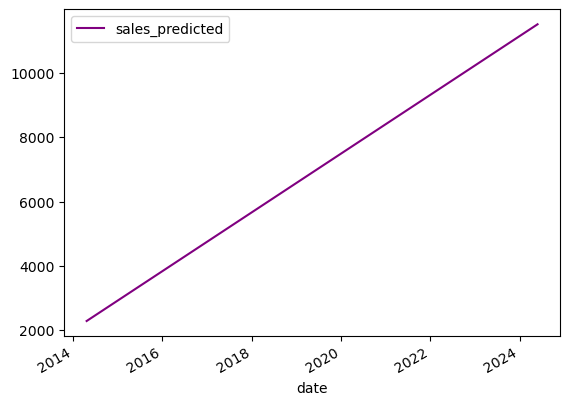

In [13]:
best_fit_line = df_store5_predicted.plot.line(
    x = "date",
    y = "sales_predicted",
    color = "purple"
)
best_fit_line

<Axes: xlabel='date'>

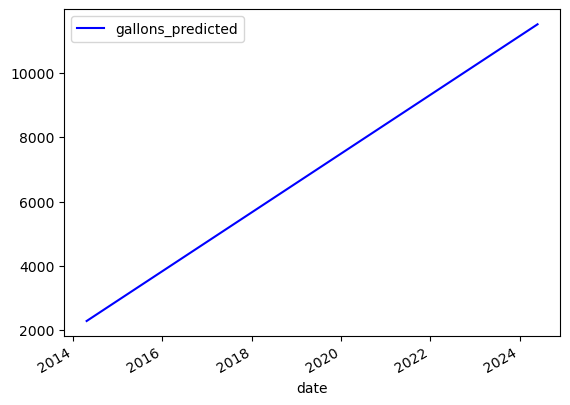

In [14]:
predicted_y_gallon_values = model.predict(X)

df_store5_gallons_predicted = df_store5_data.copy()

df_store5_gallons_predicted["gallons_predicted"] = predicted_y_gallon_values

df_store5_gallons_predicted.head()

best_fit_line_gallons = df_store5_gallons_predicted.plot.line(
    x = "date",
    y = "gallons_predicted",
    color = "blue"
)
best_fit_line_gallons